## Exploratory Data Analysis of  myPertamina Review

### Referensi
### Scraping Review
#### https://medium.com/analytics-vidhya/google-play-store-apps-reviews-scraping-and-text-analytics-sentiment-analysis-5303294fffa7

In [16]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google_play_scraper import app, Sort, reviews_all

# Define and configure Google Play Scraper Library
myPertamina_users_review = reviews_all(
    'com.dafturn.mypertamina',
    sleep_milliseconds=0,
    lang='en',
    country='id',
    sort=Sort.NEWEST,
)

# Convert collected reviews data into dataframe
df_reviews = pd.DataFrame(np.array(myPertamina_users_review),columns=['review'])
df_reviews = df_reviews.join(pd.DataFrame(df_reviews.pop('review').to_list()))

# Display dataframe header
#df_reviews.head()

In [20]:
# Check dataframe information
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21773 entries, 0 to 21772
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              21773 non-null  object        
 1   userName              21773 non-null  object        
 2   userImage             21773 non-null  object        
 3   content               21773 non-null  object        
 4   score                 21773 non-null  int64         
 5   thumbsUpCount         21773 non-null  int64         
 6   reviewCreatedVersion  18561 non-null  object        
 7   at                    21773 non-null  datetime64[ns]
 8   replyContent          2532 non-null   object        
 9   repliedAt             2532 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(6)
memory usage: 1.7+ MB


In [22]:
# Export dataframe to csv file
#df_reviews_content = df_reviews[['content','score']]
#df_reviews_content.to_csv('myPertamina_review_en_1.csv')

In [18]:
# Count number of review scores
df_reviews['score'].value_counts()

1    17481
5     2619
2      732
3      562
4      379
Name: score, dtype: int64

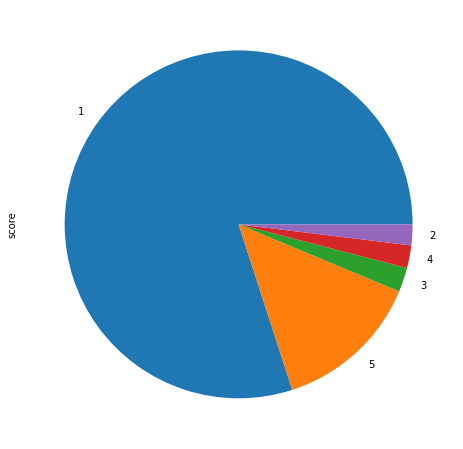

In [12]:
# Visualize review scores as pie chart
df_reviews['score'].value_counts().plot(kind='pie', figsize=(8,8))

In [1]:
# Tahapan ATS
# Input text, split into sentences, remove stop words, build a similarity matrix,
# generate rank based on matrix, pick top N sentence for summary
from nltk.corpus import stopwords
from nltk.cluster.util import cosine_distance
import numpy as np
import networkx as nx

#### https://towardsdatascience.com/understand-text-summarization-and-create-your-own-summarizer-in-python-b26a9f09fc70

In [105]:
#EDA
#1 Baca Data
import pandas as pd
import string
import nltk
import re
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords

df = pd.read_csv('myPertamina_review_id.csv')
df = df[df['score'] == 1] # ambil data dengan rating 2
review1 = df['content'].iloc[0:1000]

sentences = []

def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F" #emticons
                               u"\U0001F300-\U0001F5FF" #symbols & pi
                               u"\U0001F680-\U0001F6FF" #transport &
                               u"\U0001F1E0-\U0001F1FF" #flags (iOS)
                               u"\U00002500-\U00002BEF" # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

def remove_numbers(text):
    return re.sub(r'\d+', '', text)

def remove_punctuations(text):
    words1 = nltk.word_tokenize(text)
    punt_removed = [w for w in words1 if w.lower() not in string.punctuation]

    return punt_removed

def remove_stopwords(text, lang='indonesian'):
    words = nltk.word_tokenize(text)
    lang_stopwords = stopwords.words(lang) 
    stopwords_removed = [w for w in words if w.lower() not in lang_stopwords]
    return " ".join(stopwords_removed)
      
for review in review1:
    #print(review)
    review = remove_emoji(review)
    review = remove_numbers(review)
    review = remove_stopwords(review)
    token_sentence = sent_tokenize(review) # sentence tokenizing
    for x in token_sentence:
        sentences.append(x)

words = []
for sentence in sentences:
    if len(sentence) > 2 :
        words.append(remove_punctuations(sentence))        
#words

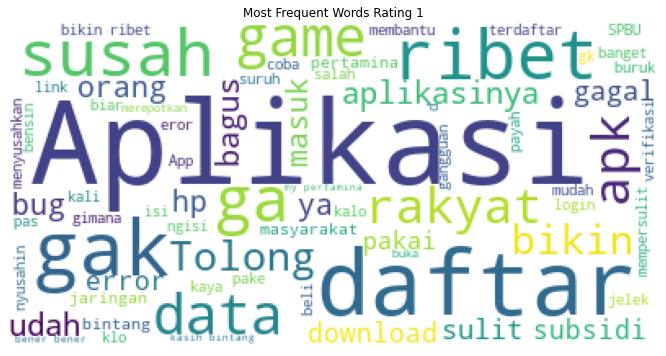

In [108]:
# wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

sentences1 = " ".join([sentence for sentence in sentences])

#create stopword list
stopwords = set(["yg", "aja", "nya", "sih"])

wordcloud = WordCloud(stopwords=stopwords, max_words=70, background_color="white").generate(sentences1)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words Rating 1')
plt.axis("off")
plt.show()

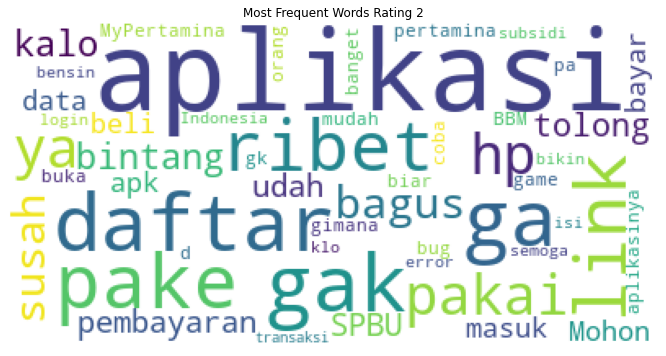

In [98]:
sentences1 = " ".join([sentence for sentence in sentences])
#create stopword list
stopwords = set(["yg", "aja", "nya"])

wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(sentences1)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words Rating 2')
plt.axis("off")
plt.show()

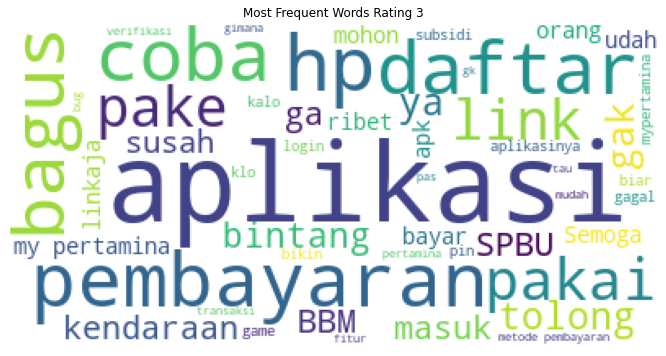

In [100]:
sentences1 = " ".join([sentence for sentence in sentences])
#create stopword list
stopwords = set(["yg", "aja", "nya"])

wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(sentences1)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words Rating 3')
plt.axis("off")
plt.show()

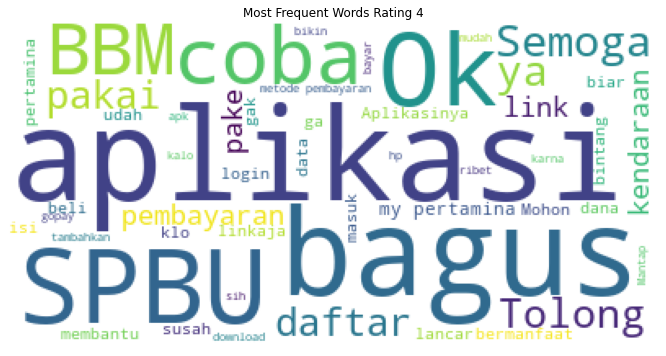

In [102]:
sentences1 = " ".join([sentence for sentence in sentences])
#create stopword list
stopwords = set(["yg", "aja", "nya"])

wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(sentences1)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words Rating 4')
plt.axis("off")
plt.show()

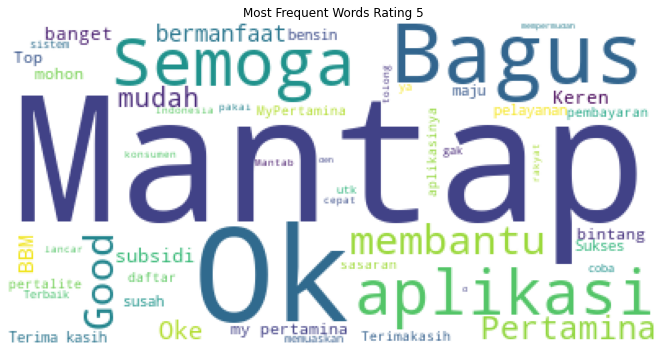

In [104]:
sentences1 = " ".join([sentence for sentence in sentences])
#create stopword list
stopwords = set(["yg", "aja", "nya"])

wordcloud = WordCloud(stopwords=stopwords, max_words=50, background_color="white").generate(sentences1)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud.recolor(random_state=2017))
plt.title('Most Frequent Words Rating 5')
plt.axis("off")
plt.show()